<a href="https://colab.research.google.com/github/sagarkhairkar15/hotel-booking-analysis/blob/main/Copy_of_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

# ***Importing the Libraries***

In [ ]:
#numpy to handle numerical array based calculation
import numpy as np   
import seaborn as sns 
%matplotlib inline
#pandas for handling analysis of the dataset 
import pandas as pd  
#matplotlib for visulazing the analysis
import matplotlib.pyplot as plt

# ***Reading the CSV File***

In [ ]:
df = pd.read_csv("Hotel Bookings.csv")


# ***Mounting the Drive***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# ***Exploring the DataSet***

In [ ]:
df.head().T

,0,1,2,3,4
hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel
is_canceled,0,0,0,0,0
lead_time,342,737,7,13,14
arrival_date_year,2015,2015,2015,2015,2015
arrival_date_month,July,July,July,July,July
arrival_date_week_number,27,27,27,27,27
arrival_date_day_of_month,1,1,1,1,1
stays_in_weekend_nights,0,0,0,0,0
stays_in_week_nights,0,0,1,1,2
adults,2,2,1,1,2


In [ ]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


# ***Finding out the number of Rows and Column by Shaping the Data***

In [ ]:
df.shape

(119390, 32)

# ***Pulling the information of DataSet***

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# ***Discription of Dataset***

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


# ***Dropping the null Values Column***

## *Dropping the column['company','agent']*

In [ ]:
df.drop(columns=["company","agent"],inplace=True)

## *Verify whethere it is dropped*

In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

## *Seems like Children column has few null values*

In [ ]:
df.children.isna().sum()

4

# ***So we have 4 values over here, we can fill that using mode***

In [ ]:
df.children.fillna(df.children.mode,inplace=True)

In [ ]:
df.children.isna().sum()

0

# ***seems like we have few null values in country column***

In [ ]:
df.country.isna().sum()

488

# ***There are 488 null values. We can fill using mode***

In [ ]:
df.country.fillna(df.country.mode,inplace=True)

In [ ]:
df.country.isna().sum()

0

Text(0.5, 1.0, 'Places of missing values in column')

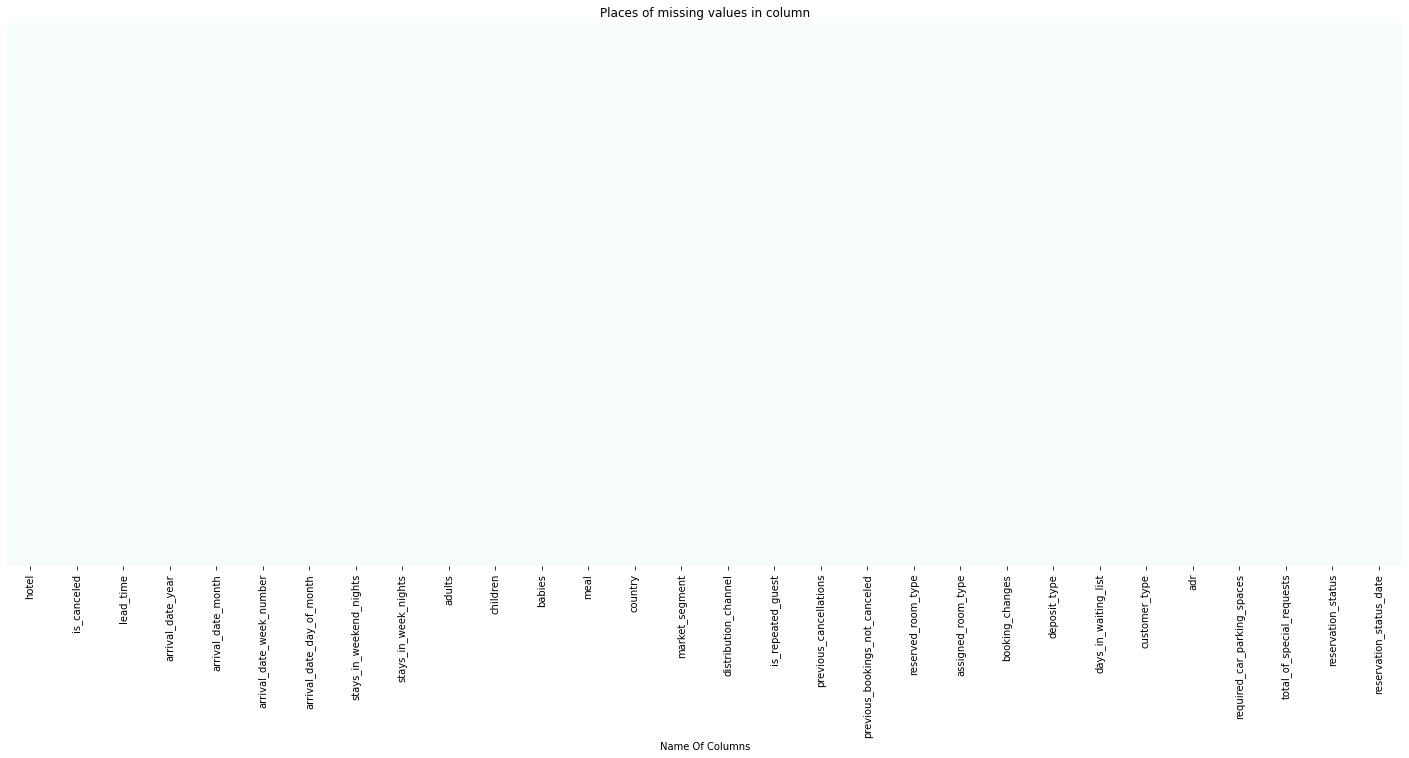

In [ ]:
# Visulaizing null values through heatmap.
plt.figure(figsize=(25, 10))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False,cmap=plt.cm.BuGn)
plt.xlabel("Name Of Columns")
plt.title("Places of missing values in column")

# ***Now our Dataset is cleaned***

## ***Types of Hotel***

In [ ]:
df['hotel'].value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

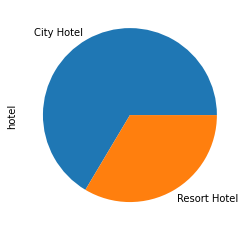

In [ ]:
df['hotel'].value_counts().plot(kind='pie')

# *City hotel has booked in majority than Resort hotel*

# ***Lets Calculate the booking cancellation percentages***


In [ ]:
print('Total Bookings cancelled')
print(df.is_canceled.value_counts())
print('Cancelation percentage')
print(df.is_canceled.value_counts(normalize=True)*100)

Total Bookings cancelled
0    75166
1    44224
Name: is_canceled, dtype: int64
Cancelation percentage
0    62.958372
1    37.041628
Name: is_canceled, dtype: float64


# ***We can conclude that the 47% of cancellation were done in a year***

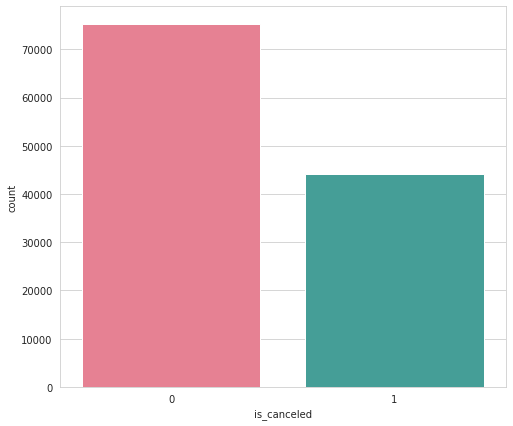

In [ ]:
plt.figure(figsize=(8,7))
sns.set_style('whitegrid')
sns.countplot(x=df['is_canceled'],palette='husl')
plt.show()
# 0 is not canceled and 1 is  canceled

# ***Calculating the Special requests***

In [ ]:
df.total_of_special_requests.value_counts(normalize=True)*100

0    58.897730
1    27.829801
2    10.862719
3     2.091465
4     0.284781
5     0.033504
Name: total_of_special_requests, dtype: float64

# *Here we can see 1st special request has made 26% of total bookings. 2nd special request has made 10% among all and 1% for 3rd special request.*

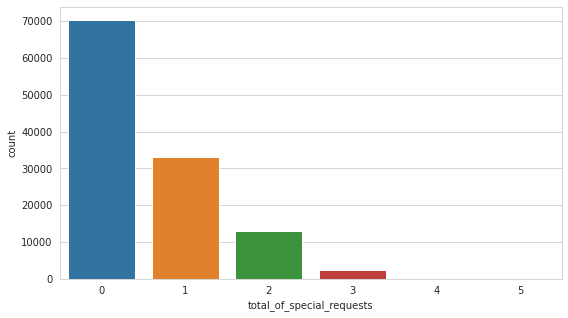

In [ ]:
plt.figure(figsize=(9,5))
sns.set_style('whitegrid')
sns.countplot(x='total_of_special_requests',data=df)
plt.show()

# ***Calculating the booking ratio between City hotel and Resort hotel***

In [ ]:
plt.rcParams['figure.figsize'] = 8,8
labels = df['hotel'].value_counts().index.tolist()
sizes = df['hotel'].value_counts().tolist()
colors = ['YELLOW','RED']
explode = [0,0.2]

([<matplotlib.patches.Wedge at 0x7fb482651890>,
 [Text(-0.956416133381298, -0.5433858480011854, 'City Hotel'),
  Text(1.1303099758142618, 0.6421832749104912, 'Resort Hotel')],
 [Text(-0.5216815272988897, -0.29639228072791923, '66.4%'),
  Text(0.6955753697318533, 0.3951897076372253, '33.6%')])

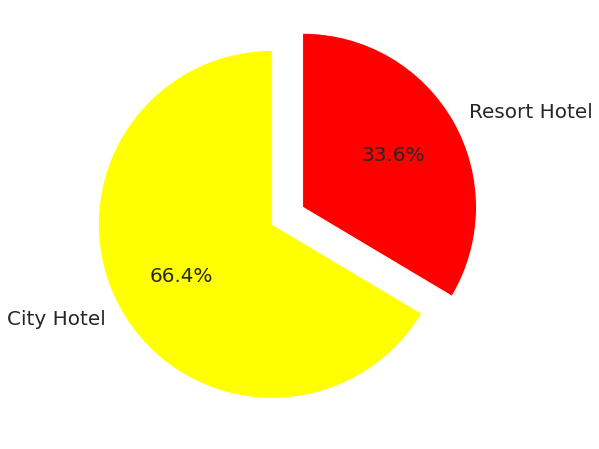

In [ ]:
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',startangle=90, textprops={'fontsize':20})

# ***From which countary the most guest came?***

In [ ]:
df.country.value_counts(normalize=True)*10

TypeError: ignored

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'Series'


PRT    4.069855
GBR    1.015914
FRA    0.872351
ESP    0.717648
DEU    0.610353
         ...   
DJI    0.000084
BWA    0.000084
HND    0.000084
VGB    0.000084
NAM    0.000084
Name: country, Length: 178, dtype: float64

## ***Portugal has highest 50.02% of the guest, followed by Great Britain with 10.15%, France, Spain and Germany.***

## ***Majority of the guests are from European Countries***

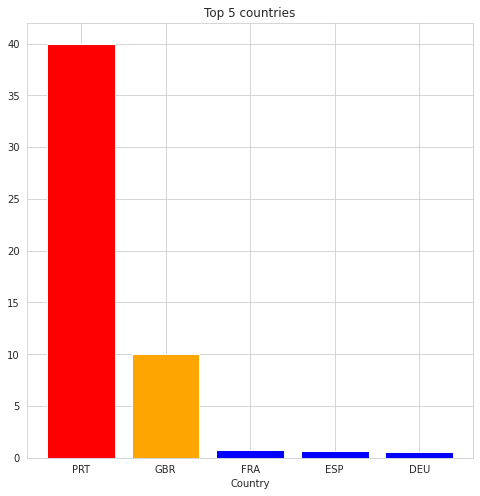

In [ ]:
x=['PRT','GBR','FRA','ESP','DEU']
h=[40,10,0.8,0.7,0.6]
plt.bar(x,h,color=["red","orange","blue","blue","blue"])
plt.xlabel('Country')
plt.title("Top 5 countries")
plt.show()

# ***Booking per year***

In [ ]:
df.arrival_date_year.value_counts(normalize=True)

2016    0.474973
2017    0.340791
2015    0.184237
Name: arrival_date_year, dtype: float64

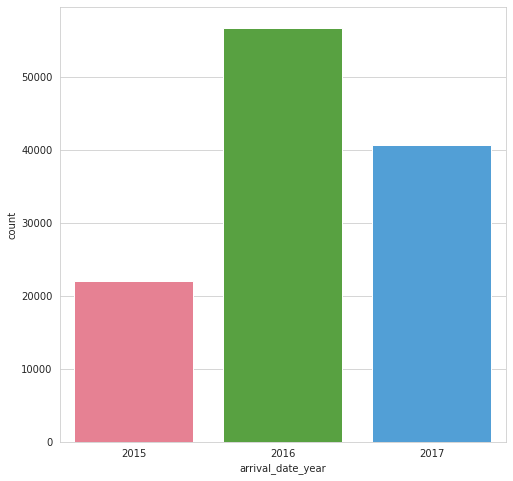

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(x=df['arrival_date_year'], palette='husl')
plt.show()

## *Conclusion : There has many arrivals in the year 2016 than any other year.*

# ***Bussiest Month For Hotels***

In [ ]:
df.arrival_date_month.value_counts(normalize=True)

August       0.116233
July         0.106047
May          0.098760
October      0.093475
April        0.092880
June         0.091624
September    0.088014
March        0.082034
February     0.067577
November     0.056906
December     0.056789
January      0.049661
Name: arrival_date_month, dtype: float64

## *The Month with highest booking is august which has 11.62% reservation. The month with lowest booking is january which has 4.96% of reservation.*

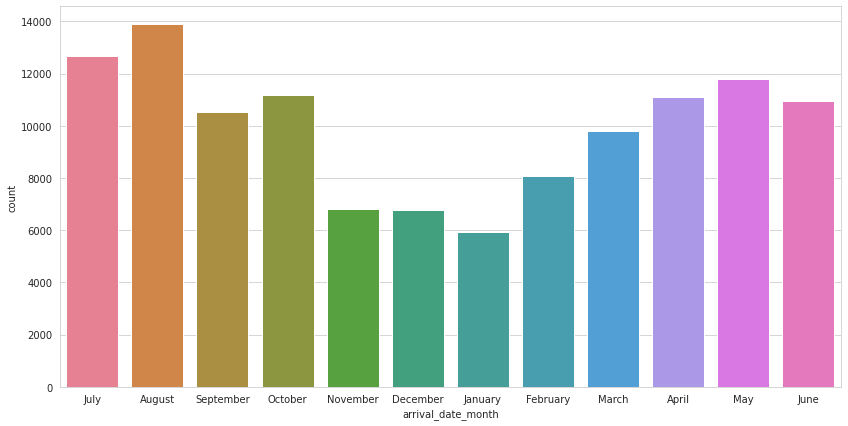

In [ ]:
plt.figure(figsize=(14,7))
sns.countplot(x=df['arrival_date_month'], palette='husl')
plt.show()

## *We can say that the busiest month for hotels is august which has 13.20% of reservation*

# ***Meal Type***

In [ ]:
df.meal.value_counts(normalize=True)

BB           0.773180
HB           0.121141
SC           0.089203
Undefined    0.009791
FB           0.006684
Name: meal, dtype: float64

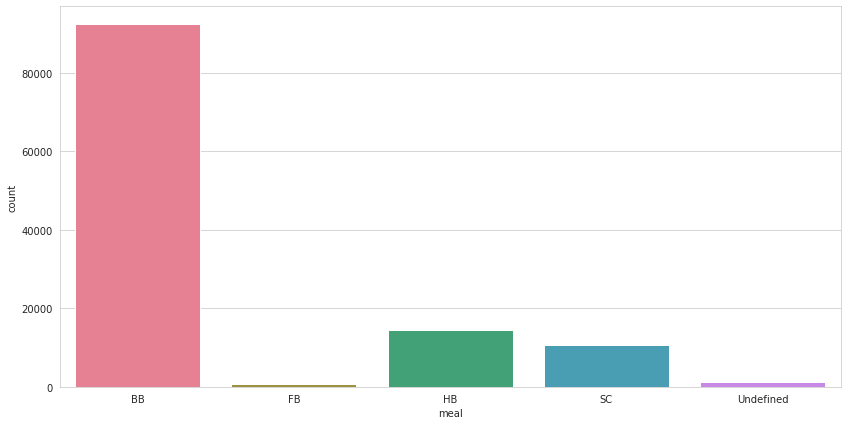

In [ ]:
plt.figure(figsize=(14,7))
sns.countplot(x=df['meal'], palette='husl')
plt.show()

# ***Number of travellers in various month***

<BarContainer object of 12 artists>

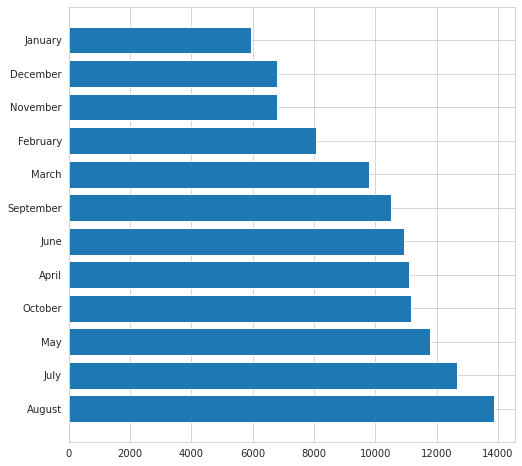

In [ ]:
arrival_month = df.arrival_date_month.value_counts()
plt.barh(arrival_month.index,arrival_month.values)

### ***Peak Months are August, July and May.***

# ***Accomodation Room Types***

In [ ]:
df.reserved_room_type.value_counts()

A    85994
D    19201
E     6535
F     2897
G     2094
B     1118
C      932
H      601
P       12
L        6
Name: reserved_room_type, dtype: int64

# ***Room Types***

In [ ]:
df.reserved_room_type.value_counts(normalize=True)

A    0.720278
D    0.160826
E    0.054737
F    0.024265
G    0.017539
B    0.009364
C    0.007806
H    0.005034
P    0.000101
L    0.000050
Name: reserved_room_type, dtype: float64

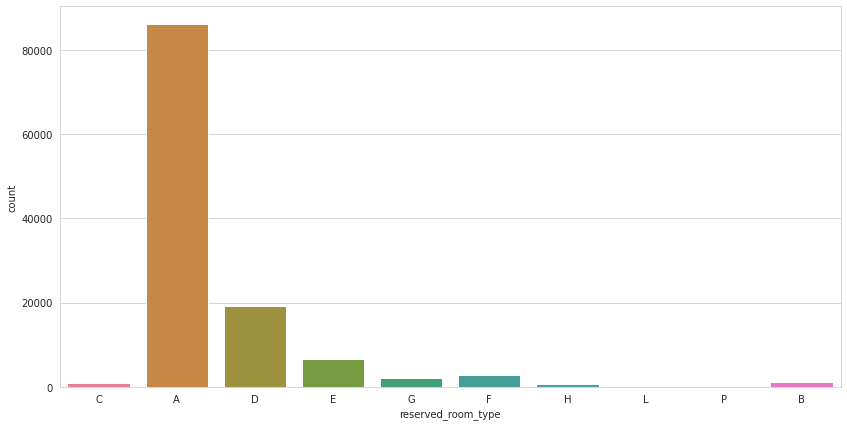

In [ ]:
plt.figure(figsize=(14,7))
sns.countplot(x=df['reserved_room_type'], palette='husl')
plt.show()

# ***Online booking vs Offline booking***

In [ ]:
modes = df.market_segment.value_counts()
modes

Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

In [ ]:
filtered_df=df.filter(["hotel","arrival_date_month","market_segment"])
filtered_df

,hotel,arrival_date_month,market_segment
0,Resort Hotel,July,Direct
1,Resort Hotel,July,Direct
2,Resort Hotel,July,Direct
3,Resort Hotel,July,Corporate
4,Resort Hotel,July,Online TA
...,...,...,...
119385,City Hotel,August,Offline TA/TO
119386,City Hotel,August,Online TA
119387,City Hotel,August,Online TA
119388,City Hotel,August,Online TA


In [ ]:
onlineta=filtered_df[filtered_df["market_segment"]=="Online TA"]
onlineta

,hotel,arrival_date_month,market_segment
4,Resort Hotel,July,Online TA
5,Resort Hotel,July,Online TA
8,Resort Hotel,July,Online TA
10,Resort Hotel,July,Online TA
11,Resort Hotel,July,Online TA
...,...,...,...
119382,City Hotel,August,Online TA
119386,City Hotel,August,Online TA
119387,City Hotel,August,Online TA
119388,City Hotel,August,Online TA


<BarContainer object of 2 artists>

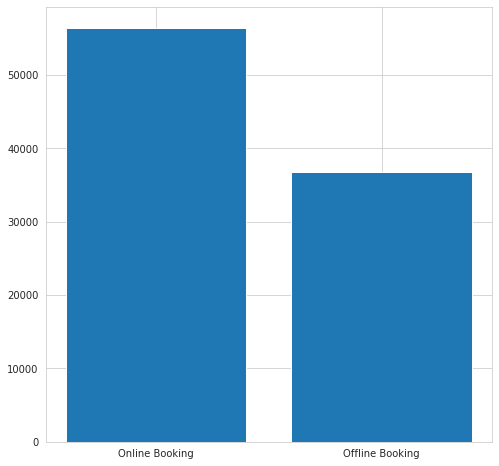

In [ ]:
mode = ["Online Booking", "Offline Booking"]
mode_count = [modes["Online TA"],modes["Offline TA/TO"]+modes["Direct"]]
plt.bar(mode,mode_count)

## ***customers perfers to book online hotel rather than offline one***

In [ ]:
count_cancel=len(df[(df["market_segment"]=="Online TA") & df["is_canceled"]!=0])
total_online = len(df[(df["market_segment"]=="Online TA")])
print("Possibility of Not Cancelling is:",round(100-(count_cancel*100/total_online),2))

Possibility of Not Cancelling is: 63.28


# ***Lets have look on people who booked the hotel***

In [ ]:
# Looking into adults. 
# Using groupby to group according to hotel types only.
df['adults'].groupby(df['hotel']).describe()

,count,mean,std,min,25%,50%,75%,max
hotel,,,,,,,,
City Hotel,79330.0,1.850977,0.509292,0.0,2.0,2.0,2.0,4.0
Resort Hotel,40060.0,1.867149,0.697285,0.0,2.0,2.0,2.0,55.0


In [ ]:
df['children'].groupby(df['hotel']).describe()

,count,unique,top,freq
hotel,,,,
City Hotel,79330.0,5.0,0.0,74220.0
Resort Hotel,40060.0,5.0,0.0,36576.0


In [ ]:
df['babies'].groupby(df['hotel']).describe()

,count,mean,std,min,25%,50%,75%,max
hotel,,,,,,,,
City Hotel,79330.0,0.004941,0.084323,0.0,0.0,0.0,0.0,10.0
Resort Hotel,40060.0,0.013904,0.118998,0.0,0.0,0.0,0.0,2.0


# *Ratio of Repeated Guest*

In [ ]:
df.is_repeated_guest.value_counts(normalize=True)

0    0.968088
1    0.031912
Name: is_repeated_guest, dtype: float64

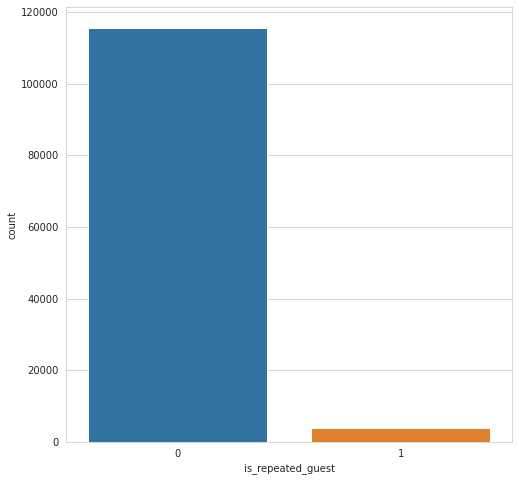

In [ ]:
plot=sns.countplot(data=df,x="is_repeated_guest")

# ***Reservation Status***

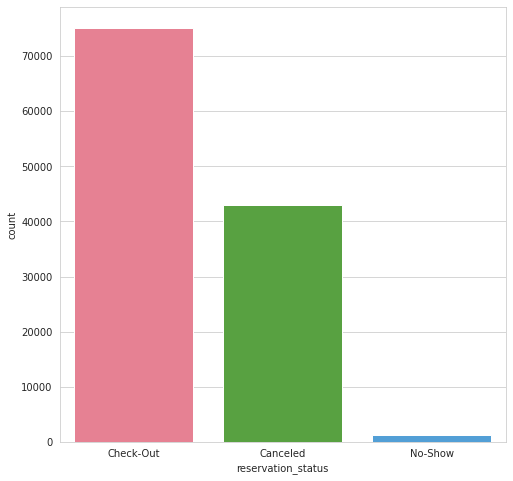

In [ ]:
df.reservation_status.value_counts(normalize=True)
sns.countplot(x=df['reservation_status'],palette='husl')

# ***Average Stays on Weekend and Weekdays***

### *Average Stays on Weekend*

0.4637993131753078


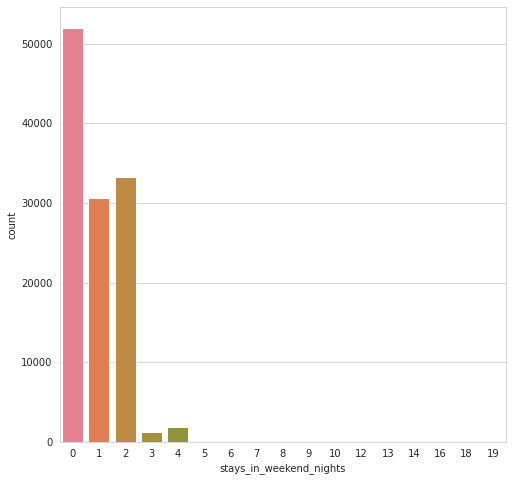

In [ ]:
df.stays_in_weekend_nights.value_counts(normalize=True)
sns.countplot(x=df['stays_in_weekend_nights'],palette='husl')
print(df.stays_in_weekend_nights.mean()/2)

### *Average Stays on Weekdays*

0.5000603065583382


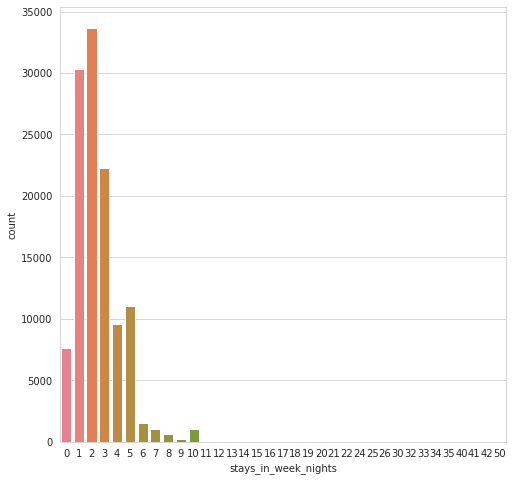

In [ ]:
df.stays_in_week_nights.value_counts(normalize=True)
sns.countplot(x=df['stays_in_week_nights'],palette='husl')
print(df.stays_in_week_nights.mean()/5)

# ***Checking the Tavellers with Childrens***

In [ ]:
df.children[df.children!=0]

13        1.0
45        2.0
55        2.0
65        2.0
87        1.0
         ... 
119270    1.0
119287    1.0
119293    2.0
119318    1.0
119319    2.0
Name: children, Length: 8594, dtype: object

# ***Checking the Tavellers without Babies***

In [ ]:
df.babies.value_counts()

0     118473
1        900
2         15
10         1
9          1
Name: babies, dtype: int64

# ***Checking the adult travellers count***

In [ ]:
df.adults.value_counts()

2     89680
1     23027
3      6202
0       403
4        62
26        5
27        2
20        2
5         2
40        1
50        1
55        1
6         1
10        1
Name: adults, dtype: int64

In [ ]:
single = df[(df['children']==0) & (df['babies']==0)]
actual_single = len(df[df['adults']==1])
actual_single

23027

***Around 23027 rooms are booked as single room.***

In [ ]:
actual_couple  = len(df[df['adults']==2])
actual_couple

89680

***Around 89680 rooms are booked as coupled rooms***

In [ ]:
actual_family = len(df) - actual_couple - actual_single
actual_family

6683

***Around 6683 rooms are booked as family rooms***

# ***Room Types***

<BarContainer object of 3 artists>

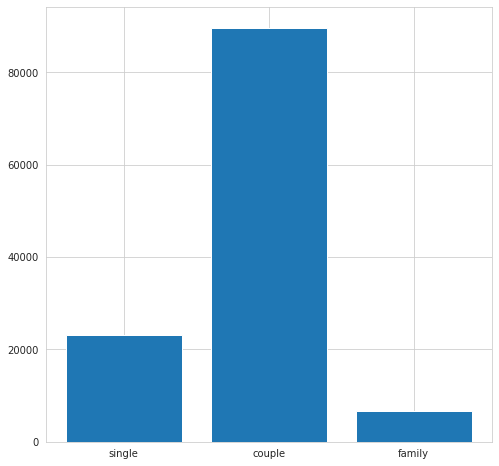

In [ ]:
rooms = ['single','couple','family']
room_count = [actual_single,actual_couple,actual_family]
plt.bar(rooms,room_count)

### ***we can say that the majority of rooms are booked for couples***

# ***Customers satisfactory***

In [ ]:
reserv = df.reserved_room_type.value_counts()

In [ ]:
assign = df.assigned_room_type.value_counts()

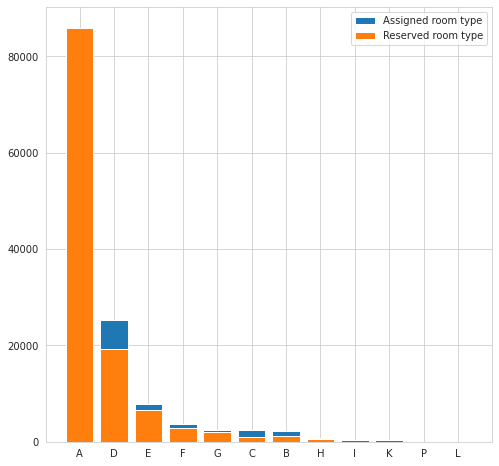

In [ ]:
plt.bar(assign.index,assign.values,label="Assigned room type")
plt.bar(reserv.index,reserv.values,label="Reserved room type")
plt.legend()

In [ ]:
def fun(x,y):
    if x==y:
        return True
    else:
        return False

In [ ]:
df["prefer"] = df.apply(lambda x: fun(x.reserved_room_type,x.assigned_room_type),axis=1)

<BarContainer object of 2 artists>

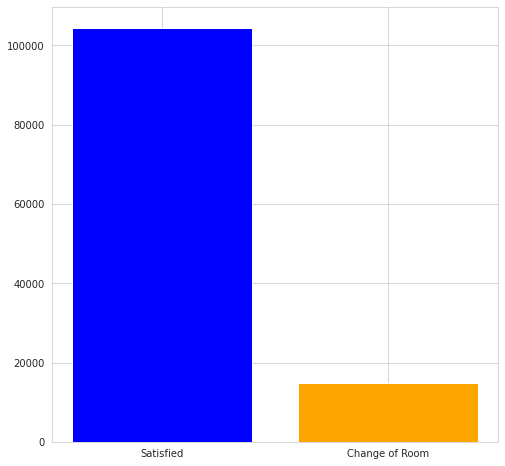

In [ ]:
sat_count = df["prefer"].value_counts()
model = ["Satisfied","Change of Room"]
data_sat = [sat_count[True],sat_count[False]]
plt.bar(model,data_sat,color = ['blue','orange'])

# ***majority of customers got satisfied with their room type***

# ***Correlation of a Column***

Text(0.5, 1.0, 'Co-relation of the columns')

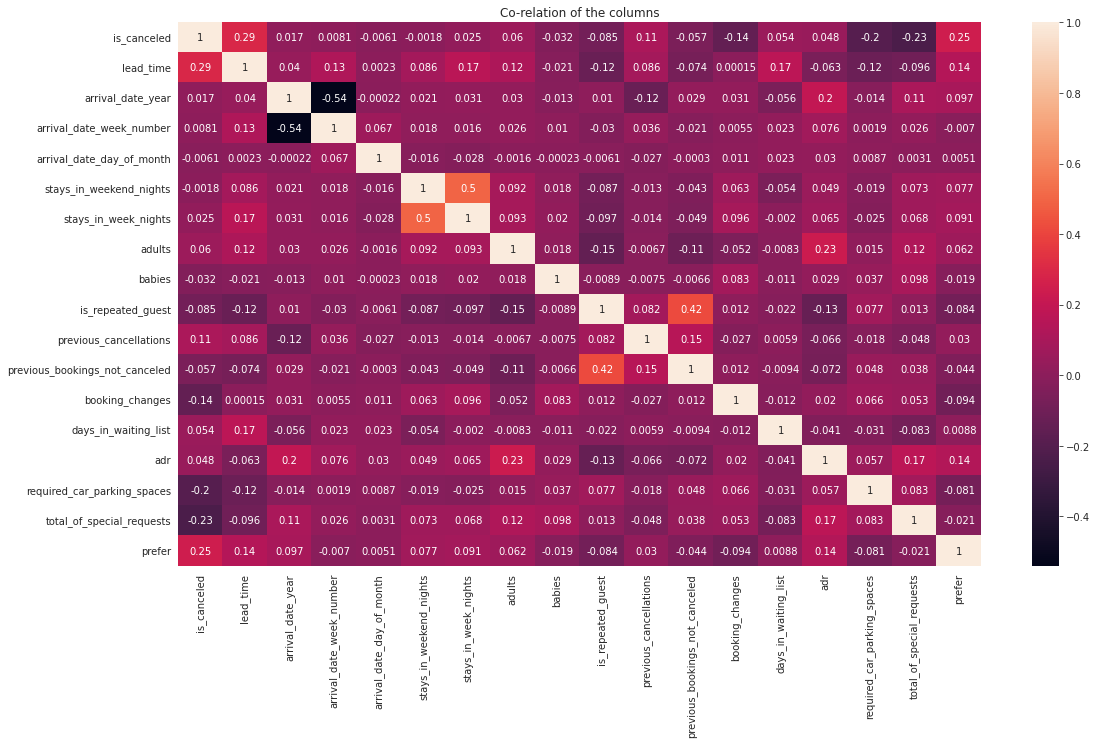

In [ ]:
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(),annot=True)
plt.title('Co-relation of the columns')